In [1]:
#!/home/big-dama/anaconda3/bin/python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick
from skfeature.function.similarity_based import lap_score
from skfeature.function.similarity_based import SPEC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
# the dataset contains 198 features extracted from NII Tokyo Darknet traces, 1min interval 1week in Jan-Jun 2019, 
# occasionally traces do not have fist/last minute -> dataset contains 60467 not 60480 
# (6*7*24*60, months*days*hours*minutes)
dataset_loc = ('datasets/darknet_features_201901_06.csv')
dataset =  pd.read_csv(dataset_loc, index_col=False)
dataset.drop(columns=['file_name'],inplace=True)

In [ ]:
#reordered_columns_orig = ['vol(frame_len)','avg(frame_len)','avg(tcp_len)','avg(tcp_winsize)','avg(ip_len)','entropy(frame_len)','entropy(tcp_len)','entropy(tcp_winsize)','entropy(ip_len)','var(frame_len)','var(tcp_len)','var(tcp_winsize)','var(ip_len)','stddev(frame_len)','stddev(tcp_len)','stddev(tcp_winsize)','stddev(ip_len)','p50(frame_len)','p75(frame_len)','p50(ip_len)','p75(ip_len)','p50(tcp_len)','p1(tcp_winsize)','p2(tcp_winsize)','p5(tcp_winsize)','p10(tcp_winsize)','p15(tcp_winsize)','p20(tcp_winsize)','p25(tcp_winsize)','p50(tcp_winsize)','p75(tcp_winsize)','p97(tcp_winsize)','p99(tcp_winsize)','entropy(tcp_flags)','frac_tcpflag(tcp_flags_ack)','frac_tcpflag(tcp_flags_push)','frac_tcpflag(tcp_flags_syn)','frac_tcp(ip_proto)','frac_udp(ip_proto)','frac_gre(ip_proto)','frac_icmp(ip_proto)','entropy(icmp_type)','frac_echo_request(icmp_type)','frac_echo_reply(icmp_type)','frac_ipv4','frac_ipv6','frac_well_known(tcp_dstport)','frac_well_known(tcp_srcport)','frac_registered_ports(tcp_dstport)','frac_registered_ports(tcp_srcport)','frac_dynamic_ports(tcp_dstport)','frac_dynamic_ports(tcp_srcport)','frac_document_retrieval_tcp(tcp_dstport)','frac_document_retrieval_tcp(tcp_srcport)','frac_mail_tcp(tcp_dstport)','frac_mail_tcp(tcp_srcport)','frac_remote_access_tcp(tcp_dstport)','frac_remote_access_tcp(tcp_srcport)','frac_well_known(udp_dstport)','frac_well_known(udp_srcport)','frac_registered_ports(udp_dstport)','frac_registered_ports(udp_srcport)','frac_dynamic_ports(udp_dstport)','frac_dynamic_ports(udp_srcport)','frac_networking_udp(udp_dstport)','frac_networking_udp(udp_srcport)','entropy_1st_ip_octet(ip_dst)','entropy_2nd_ip_octet(ip_dst)','entropy_3rd_ip_octet(ip_dst)','entropy_4th_ip_octet(ip_dst)','entropy_1st_ip_octet(ip_src)','entropy_2nd_ip_octet(ip_src)','entropy_3rd_ip_octet(ip_src)','entropy_4th_ip_octet(ip_src)']
#reordered_columns_orig_boxplot = ['vol(frame_len)','avg(frame_len)','avg(tcp_len)','avg(tcp_winsize)','avg(ip_len)','entropy(frame_len)','entropy(tcp_len)','entropy(tcp_winsize)','entropy(ip_len)','var(frame_len)','var(tcp_len)','var(tcp_winsize)','var(ip_len)','stddev(frame_len)','stddev(tcp_len)','stddev(tcp_winsize)','stddev(ip_len)','p50(frame_len)','p75(frame_len)','p50(ip_len)','p75(ip_len)','p50(tcp_len)','p1(tcp_winsize)','p2(tcp_winsize)','p5(tcp_winsize)','p10(tcp_winsize)','p15(tcp_winsize)','p20(tcp_winsize)','p25(tcp_winsize)','p50(tcp_winsize)','p75(tcp_winsize)','p97(tcp_winsize)','p99(tcp_winsize)','entropy(tcp_flags)','frac(tcp_flags_ack)','frac(tcp_flags_push)','frac(tcp_flags_syn)','frac(tcp)','frac(udp)','frac(gre)','frac(icmp)','entropy(icmp_type)','frac(icmp_echo_request)','frac(icmp_echo_reply)','frac(ipv4)','frac(ipv6)','frac(tcp_well_known_dst)','frac(tcp_well_known_src)','frac(tcp_reg_ports_dst)','frac(tcp_reg_ports_src)','frac(tcp_dyn_ports_dst)','frac(tcp_dyn_ports_src)','frac(tcp_doc_retrieval_tcp_dst)','frac(tcp_doc_retrieval_tcp_src)','frac(tcp_mail_dst)','frac(tcp_mail_src)','frac(tcp_remote_acc_dst)','frac(tcp_remote_acc_src)','frac(udp_well_known_dst)','frac(udp_well_known_src)','frac(udp_reg_ports_dst)','frac(udp_reg_ports_src)','frac(udp_dyn_ports_dst)','frac(udp_dyn_ports_src)','frac(udp_networking_dst)','frac(udp_networking_src)','entropy_1st_ip_octet(dst)','entropy_2nd_ip_octet(dst)','entropy_3rd_ip_octet(dst)','entropy_4th_ip_octet(dst)','entropy_1st_ip_octet(src)','entropy_2nd_ip_octet(src)','entropy_3rd_ip_octet(src)','entropy_4th_ip_octet(src)']

# 1. Feature analysis

## 1.1. Traces/packets per 1 minute split

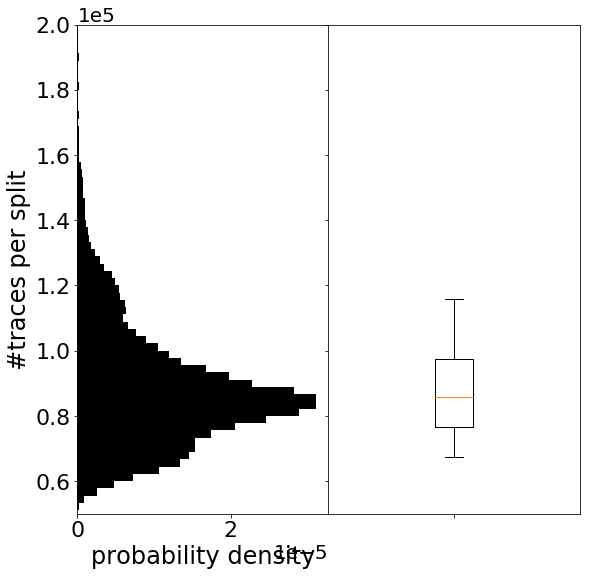

In [7]:
# to change the 1eX label size 
plt.rc('font', size=20)
fig, [ax1,ax2]= plt.subplots(1, 2, sharey=True, figsize=(9, 9))
fig.subplots_adjust(wspace=0)
#fig.suptitle('DARKNET dataset split size probability density', size=20)

ax1.hist(dataset['num_pkts(frame_len)'].values, color='black',bins = 1000, density=True,orientation="horizontal")
ax1.set_xlabel('probability density', size=16)
ax1.set_ylabel('#traces per split',size=16)

ax1.xaxis.label.set_size(24)
ax1.yaxis.label.set_size(24)
ax1.tick_params(labelsize=22)
ax1.set_ylim([50000,200000])
ax2.boxplot(dataset['num_pkts(frame_len)'].values, whis=[10,90], showfliers=False,)
ax2.set_xticklabels([''])

ax1.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
#fig.savefig('plots/darknet_split_size_probability_density.pdf',transparent=True,bbox_inches='tight', pad_inches=0, frameon=False)
plt.rcdefaults()

# 1.2. Feature distributions

In [83]:
# create list of columns for each subplot based on field from which they were extracted - mainly
frame_len_cols = [i for i in dataset.columns.values if 'frame_len' in i and 'entropy' not in i and 'vol' not in i and 'num_' not in i]
ip_len_cols = [i for i in dataset.columns.values if 'ip_len' in i and 'entropy' not in i]
ip_ttl_cols = [i for i in dataset.columns.values if 'ip_ttl' in i and 'entropy' not in i]
# remvoe variance from ip ttl as it seems TTL has more of a categorical nature - not continuously changing numerical values
ip_ttl_cols.remove('var(ip_ttl)')
tcp_len_cols = [i for i in dataset.columns.values if 'tcp_len' in i and 'entropy' not in i]
tcp_winsize_cols = [i for i in dataset.columns.values if 'tcp_winsize' in i and 'entropy' not in i]
tcp_flags_cols_num = [i for i in dataset.columns.values if 'tcp_flags' in i and 'num_' in i]
tcp_flags_cols_frac = [i for i in dataset.columns.values if 'tcp_flags' in i and 'frac_' in i]
ipv_cols = [i for i in dataset.columns.values if 'ipv' in i]
ip_proto_cols_num = [i for i in dataset.columns.values if 'ip_proto' in i and 'num_' in i]
ip_proto_cols_frac = [i for i in dataset.columns.values if 'ip_proto' in i and 'frac_' in i]
port_cols_num = [i for i in dataset.columns.values if 'port' in i and 'num_' in i]
port_cols_frac = [i for i in dataset.columns.values if 'port' in i and 'frac_' in i]
ip_octet_cols = [i for i in dataset.columns.values if ('ip_src' in i or 'ip_dst' in i)]
icmp_type_cols_num = [i for i in dataset.columns.values if 'icmp_type' in i and 'num_' in i]
icmp_type_cols_frac = [i for i in dataset.columns.values if 'icmp_type' in i and 'frac_' in i]
entropy_cols = ['entropy(icmp_type)', 'entropy(tcp_flags)','entropy(frame_len)','entropy(ip_len)','entropy(tcp_len)','entropy(tcp_winsize)','entropy(icmp_type)','entropy(ip_ttl)']
miscelanous_cols = ['frac_frag','num_frag','num_pkts(frame_len)','vol(frame_len)']

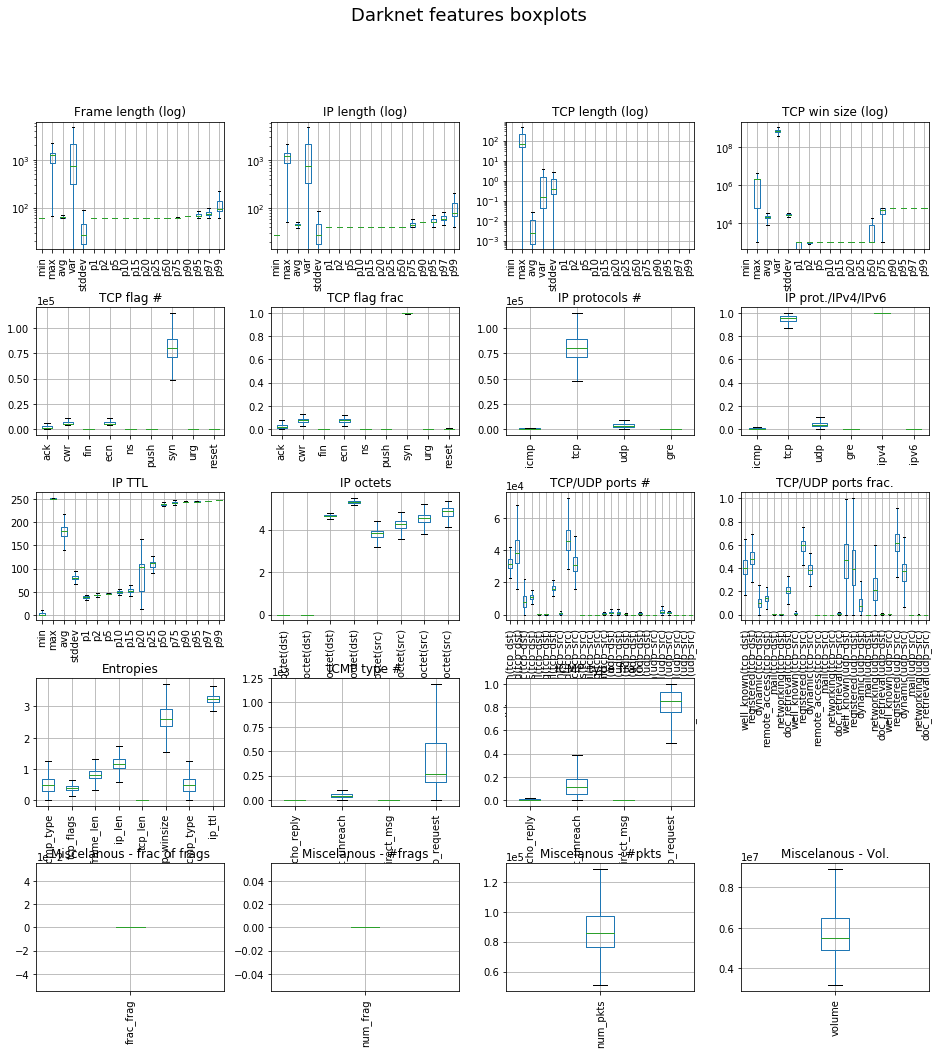

In [87]:
fig, ax = plt.subplots(5, 4, figsize=(16, 16))
fig.suptitle('Darknet features boxplots', fontsize=18)
# when they are printed separately for conf.paper this is the best choice(except miscelanous) :
# fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# ax.tick_params(labelsize=8)

feature_list_subset = frame_len_cols
# remove additional substrings
feature_list_subset_labels = [x.replace('(frame_len)', '') for x in feature_list_subset]
# 'boxplot = ' is there just so jupyter won't show some 'parameter info' text at the top of the diagram
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[0,0], showfliers = False)
# 'labels' **kwds inside boxplot is not doing anything, we have to specify it manually
ax[0,0].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[0,0].set_title("Frame length (log)")
ax[0,0].semilogy()

feature_list_subset = ip_len_cols
feature_list_subset_labels = [x.replace('(ip_len)', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[0,1], showfliers = False)
ax[0,1].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[0,1].set_title("IP length (log)")
ax[0,1].semilogy()

feature_list_subset = tcp_len_cols
feature_list_subset_labels = [x.replace('(tcp_len)', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[0,2], showfliers = False)
ax[0,2].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[0,2].set_title("TCP length (log)")
ax[0,2].semilogy()
                              
feature_list_subset = tcp_winsize_cols
feature_list_subset_labels = [x.replace('(tcp_winsize)', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[0,3], showfliers = False)
ax[0,3].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[0,3].set_title("TCP win size (log)")
ax[0,3].semilogy()

feature_list_subset = tcp_flags_cols_num
feature_list_subset_labels = [x.replace('(tcp_flags_', '(').replace('(tcp_flags)', '').replace('_tcpflag','') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('num(', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace(')', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[1,0], showfliers = False)
ax[1,0].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[1,0].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax[1,0].set_title("TCP flag #")

feature_list_subset = tcp_flags_cols_frac
feature_list_subset_labels = [x.replace('(tcp_flags_', '(').replace('(tcp_flags)', '').replace('_tcpflag','') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('frac(', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace(')', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[1,1], showfliers = False)
ax[1,1].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[1,1].set_title("TCP flag frac")

feature_list_subset = ip_proto_cols_num
feature_list_subset_labels = [x.replace('(ip_proto)', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('num_', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[1,2], showfliers = False)
ax[1,2].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[1,2].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax[1,2].set_title("IP protocols #")

feature_list_subset = ip_proto_cols_frac
feature_list_subset_labels = [x.replace('(ip_proto)', '') for x in feature_list_subset]
feature_list_subset = feature_list_subset + ipv_cols 
feature_list_subset_labels = feature_list_subset_labels + ipv_cols
feature_list_subset_labels = [x.replace('frac_', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[1,3], showfliers = False)
ax[1,3].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[1,3].set_title("IP prot./IPv4/IPv6")

feature_list_subset = ip_ttl_cols
feature_list_subset_labels = [x.replace('(ip_ttl)', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[2,0], showfliers = False)
ax[2,0].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[2,0].set_title("IP TTL")

feature_list_subset = ip_octet_cols
feature_list_subset_labels = [x.replace('(ip_octet)', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('entropy_', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('ip_', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[2,1], showfliers = False)
ax[2,1].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[2,1].set_title("IP octets")

feature_list_subset = port_cols_num
feature_list_subset_labels = [x.replace('num_', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('_ports', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('port', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('_udp', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('_tcp', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('document', 'doc') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[2,2], showfliers = False)
ax[2,2].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[2,2].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax[2,2].set_title("TCP/UDP ports #")

feature_list_subset = port_cols_frac
feature_list_subset_labels = [x.replace('frac_', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('_ports', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('port', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('_udp', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('_tcp', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('document', 'doc') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[2,3], showfliers = False)
ax[2,3].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[2,3].set_title("TCP/UDP ports frac.")

feature_list_subset = entropy_cols
feature_list_subset_labels = [x.replace('', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace(')', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('entropy(', '') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[3,0], showfliers = False)
ax[3,0].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[3,0].set_title("Entropies")

feature_list_subset = icmp_type_cols_num
feature_list_subset_labels = [x.replace('(icmp_type)', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('num_', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('destination_unreachable', 'dest_unreach') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('redirect_message', 'redirect_msg') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[3,1], showfliers = False)
ax[3,1].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[3,1].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax[3,1].set_title("ICMP type #")

feature_list_subset = icmp_type_cols_frac
feature_list_subset_labels = [x.replace('(icmp_type)', '') for x in feature_list_subset]
feature_list_subset_labels = [x.replace('frac_', '') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('destination_unreachable', 'dest_unreach') for x in feature_list_subset_labels]
feature_list_subset_labels = [x.replace('redirect_message', 'redirect_msg') for x in feature_list_subset_labels]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[3,2], showfliers = False)
ax[3,2].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[3,2].set_title("ICMP type frac.")

# when they are printed separately for conf.paper this is the best choice :
# fig, ax = plt.subplots(1, 1, figsize=(0.4, 3))
# plt.rc('font', size=20)
# ax.tick_params(labelsize=8)
feature_list_subset = miscelanous_cols[:1]
feature_list_subset_labels = [x.replace('', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[4,0], showfliers = False)
ax[4,0].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[4,0].set_title("Miscelanous - frac of frags")
ax[4,0].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

feature_list_subset = miscelanous_cols[1:2]
feature_list_subset_labels = [x.replace('', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[4,1], showfliers = False)
ax[4,1].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[4,1].set_title("Miscelanous - #frags")

feature_list_subset = miscelanous_cols[2:3]
feature_list_subset_labels = [x.replace('(frame_len)', '') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[4,2], showfliers = False)
ax[4,2].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[4,2].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax[4,2].set_title("Miscelanous - #pkts")

feature_list_subset = miscelanous_cols[3:]
feature_list_subset_labels = [x.replace('vol(frame_len)', 'volume') for x in feature_list_subset]
boxplot = dataset.boxplot(column = feature_list_subset, ax = ax[4,3], showfliers = False)
ax[4,3].set_xticklabels(feature_list_subset_labels,rotation='vertical')
ax[4,3].set_title("Miscelanous - Vol.")

# remove empty subplots and adjust existing subplots
fig.delaxes(ax[3,3])
plt.subplots_adjust(hspace = 0.45, wspace = 0.25)

## 1.3. Feature analysis
pieces of code are borrowed from https://github.com/WillKoehrsen/feature-selector

### 1.3.1. Single Unique Values

In [3]:
unique_counts = dataset.nunique()
unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats = unique_stats.sort_values('nunique', ascending = True)
unique_stats_frac = unique_stats/len(dataset)
# Find the columns with only one unique count
record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print('%d features with a single unique value.\n' % len(record_single_unique))

19 features with a single unique value.



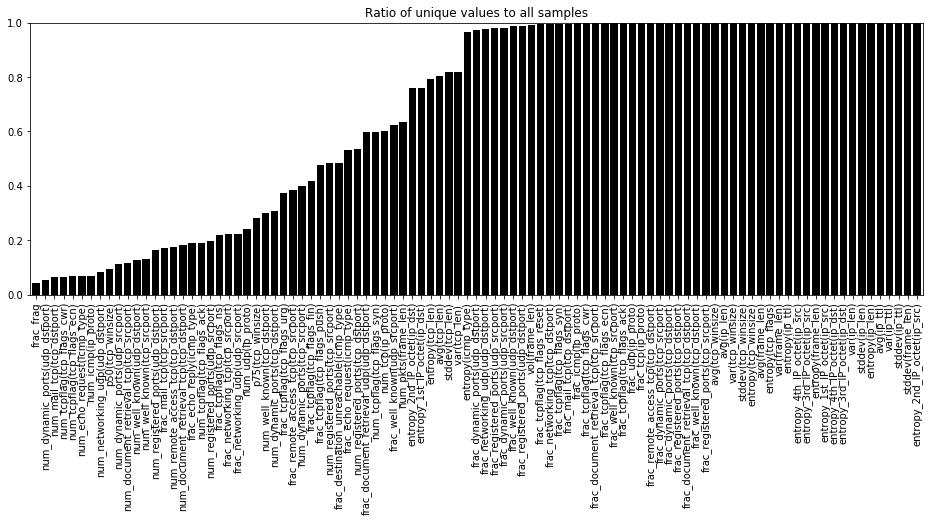

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
bar_plot = unique_stats_frac[100:].plot.bar(ax=ax, title = 'Ratio of unique values to all samples', legend=False, color ='black', width=0.8)
ax.tick_params(labelsize=10)
limits = ax.set_ylim([0,1])

### 1.3.2. Collinear Features

In [11]:
dataset_corr = dataset.corr()
correlation_threshold = 0.9
upper = dataset_corr.where(np.triu(np.ones(dataset_corr.shape), k = 1).astype(np.bool))
# Select the features with correlations above the threshold
# Need to use the absolute value
to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

In [13]:
# Dataframe to hold correlated pairs
dataset_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

# Iterate through the columns to drop to record pairs of correlated features
for column in to_drop:

    # Find the correlated features
    corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

    # Find the correlated values
    corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(corr_features))]    

    # Record the information (need a temp df for now)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                     'corr_feature': corr_features,
                                     'corr_value': corr_values})
    dataset_collinear = dataset_collinear.append(temp_df, ignore_index = True)
    
dataset_corr_filtered = dataset_corr.loc[list(set(dataset_collinear['corr_feature'])), list(set(dataset_collinear['drop_feature']))]    

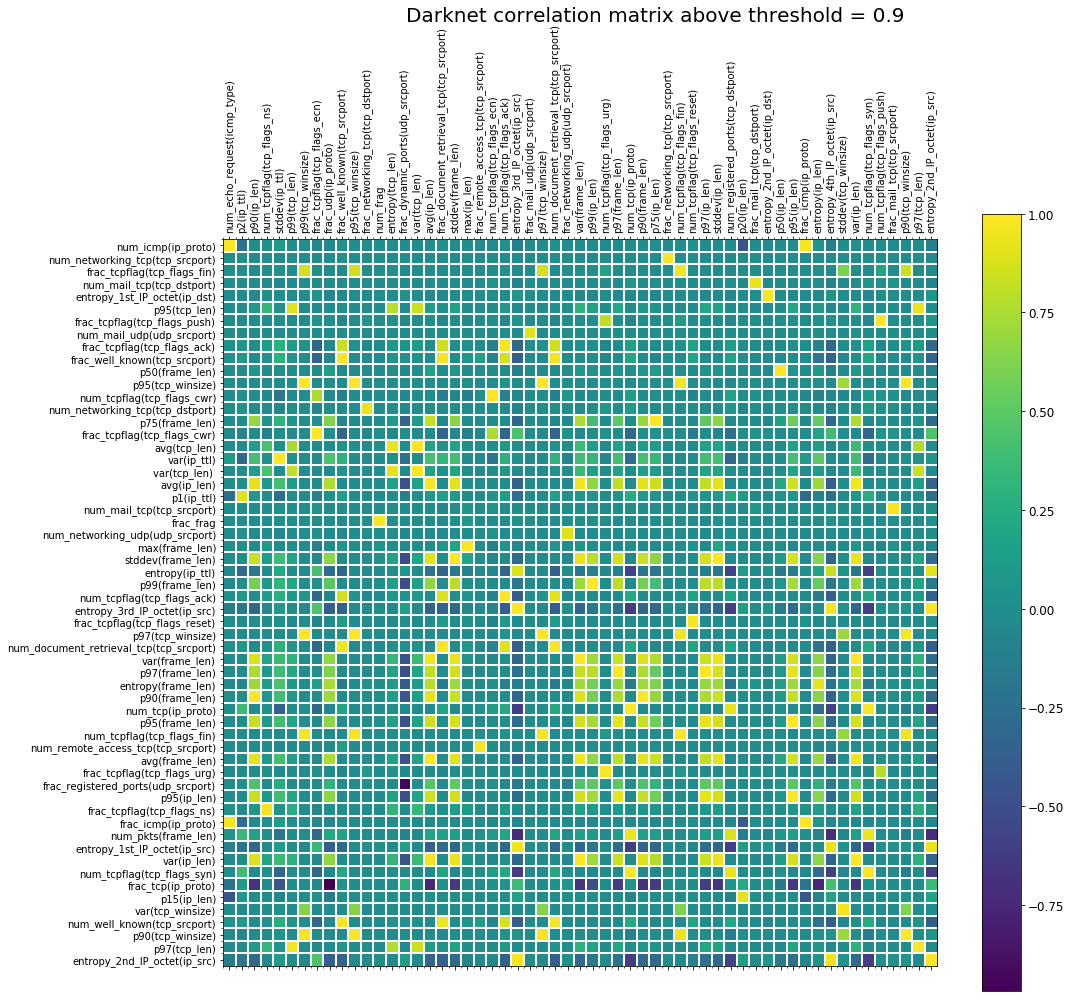

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
fig.suptitle('Darknet correlation matrix above threshold = ' + str(correlation_threshold), size=20)

heatmap = ax.matshow(dataset_corr_filtered)
ax.set_xticks(range(dataset_corr_filtered.shape[1]))
ax.set_xticklabels(dataset_corr_filtered.columns.values, fontsize=10, rotation=90)
ax.set_yticks(range(dataset_corr_filtered.shape[0]))
ax.set_yticklabels(dataset_corr_filtered.index.values, fontsize=10)

ax.set_xticks(np.arange(-.5, dataset_corr_filtered.shape[1]-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, dataset_corr_filtered.shape[0]-1, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
cb = fig.colorbar(heatmap)
cb.ax.tick_params(labelsize=12)
plt.subplots_adjust(top=0.80)


# 2. Feature selection by algorithms

In [5]:
# filter out 19 single values features
dataset.drop(columns=record_single_unique['feature'].values,inplace=True)

## 2.1. Laplacian score
"Rank features in ascending order according to their laplacian scores, the smaller the laplacian score is, the more
important the feature is"

https://papers.nips.cc/paper/2909-laplacian-score-for-feature-selection.pdf

In [5]:
dataset_lap_score = lap_score.lap_score(dataset.values)

In [6]:
#feature_selection = pd.DataFrame(columns=['feature_selection_method','score','ranking'])
#feature_selection = feature_selection.append({'feature_selection_method' : 'lap_score','score' : dataset_lap_score,'ranking' : lap_score.feature_ranking(dataset_lap_score)}, ignore_index=True)
#feature_selection.to_pickle('darknet_feature_selection.csv')
feature_selection = pd.read_pickle('darknet_feature_selection.csv')

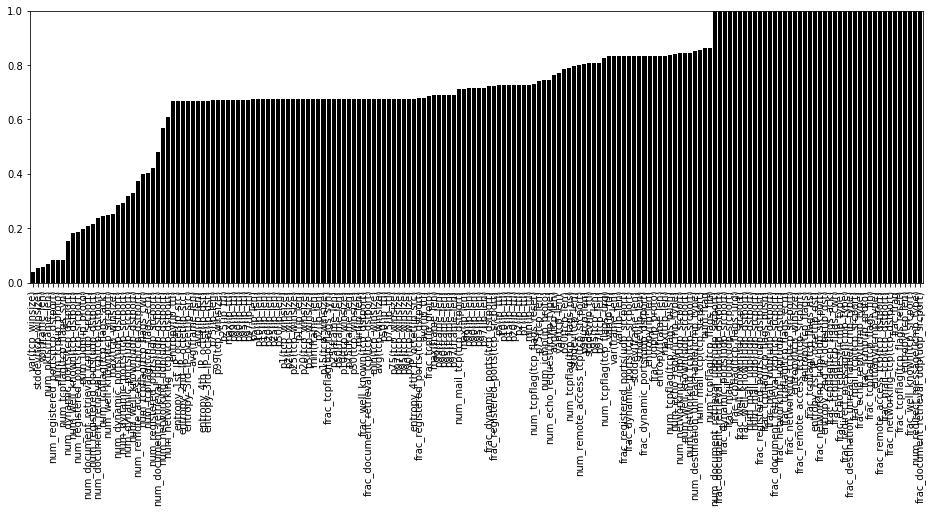

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
first = 0
last = len(dataset.columns)
dataset_lap_score = feature_selection['score'][0]
ax.bar(np.arange(dataset.shape[1])[first:last],np.sort(dataset_lap_score)[first:last], color ='black', width=0.8)
ax.tick_params(labelsize=10)
ax.set_ylim([0,1])
ax.set_xlim([-0.5,last-first-0.5])
ax.set_xticks(np.arange(dataset.shape[1])[first:last])
labels = ax.set_xticklabels(dataset.columns.values[np.argsort(dataset_lap_score)][first:last], rotation=90)

In [18]:
#feature_list = list(filter(lambda x: dataset_lap_score[x] < 1, range(len(dataset_lap_score)))) 
feature_list = list(filter(lambda x: dataset_lap_score[x] < np.percentile(dataset_lap_score,25), range(len(dataset_lap_score)))) 
#dataset_lap_score
dataset.to_csv('datasets/darknet_features_201901_06_FsLapLessP25.csv',columns=dataset.columns.values[feature_list],index=False)
dataset_test = pd.read_csv('datasets/darknet_features_201901_06_FsLapLessP25.csv',index_col=False)

scaler = StandardScaler()
scaler.fit(dataset_test)
dataset_test_scaled = pd.DataFrame(scaler.transform(dataset_test),columns=dataset_test.columns)
dataset_test_scaled.to_csv('datasets/darknet_features_201901_06_FsLapLessP25_StadardScaled.csv',index=False)

45

In [21]:
dataset_test_scaled = pd.read_csv('datasets/darknet_features_201901_06_FsLapLessP10_StadardScaled.csv',index_col=False)
len(dataset_test_scaled.columns)

18

In [22]:
# rule of thumb 1 - minpts >=2*D ; number_of_neighbors = minpts-1 -> 2*D-1
n_nbrs1 = 2*len(dataset_test_scaled.columns.values) - 1
nbrs1 = NearestNeighbors(n_neighbors=n_nbrs1).fit(dataset_test_scaled.values)
distances1, indices1 = nbrs1.kneighbors(dataset_test_scaled.values)
# rule of thumb 2 : minpts >= D+1 ; number_of_neighbors = minpts-1 -> D
n_nbrs2 = len(dataset_test_scaled.columns.values)
nbrs2 = NearestNeighbors(n_neighbors=n_nbrs2).fit(dataset_test_scaled.values)
distances2, indices2 = nbrs2.kneighbors(dataset_test_scaled.values)

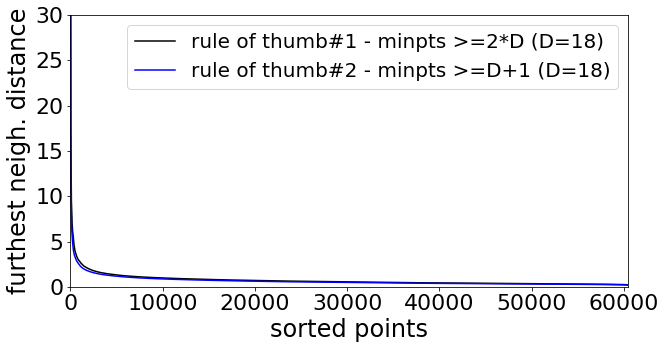

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.sort(distances1[:,n_nbrs1-1])[::-1], color='black')
ax.plot(np.sort(distances2[:,n_nbrs2-1])[::-1], color='blue')
ax.set_xlim([0,len(dataset_test_scaled)])
ax.set_ylim([0,30])

arr = np.sort(distances1[:,n_nbrs1-1])[::-1]
v_low = 5
v_high = 8
idx_low = (np.abs(arr - v_low)).argmin()
idx_high = (np.abs(arr - v_high)).argmin()

#ax.axhline(y=5, xmin=0, xmax=idx_low/len(arr),linestyle='--',color='black')
#ax.axhline(y=8, xmin=0, xmax=idx_high/len(arr),linestyle='--',color='black')
#ax.axvline(x=idx_low, ymin=0, ymax=v_low/30,linestyle='--',color='black')
#ax.axvline(x=idx_high, ymin=0, ymax=v_high/30,linestyle='--',color='black')

#ax.set_yticks(list(ax.get_yticks()) + [8])
#ax.set_xticks([0,5000,10000,15000,22497])
#ax.set_xticklabels(['0','5000','10000','15000','22500'])
ax.tick_params(labelsize=22)
ax.set_xlabel('sorted points',size=24)
ax.set_ylabel('furthest neigh. distance',size=24)

ax.legend(['rule of thumb#1 - minpts >=2*D (D=' + str(len(dataset_test_scaled.columns)) + ')'\
           ,'rule of thumb#2 - minpts >=D+1 (D=' + str(len(dataset_test_scaled.columns)) + ')'], fontsize=20)
fig.savefig('plots/darknet_FsLapLessP25_k-dist_plots.pdf',transparent=True,bbox_inches='tight', pad_inches=0, frameon=False)

In [11]:
print('Feature selection : Lap_score < 1')
print('Rule of thumb#1 50th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],50)))
print('Rule of thumb#1 90th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],90)))
print('Rule of thumb#2 50th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],50)))
print('Rule of thumb#2 90th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],90)))

Feature selection : Lap_score < 1
Rule of thumb#1 50th percentile: 5.3237153394697785
Rule of thumb#1 90th percentile: 9.945051490387977
Rule of thumb#2 50th percentile: 4.91332414787652
Rule of thumb#2 90th percentile: 9.206931861834633


In [16]:
print('Feature selection : Lap_score < p50')
print('Rule of thumb#1 50th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],50)))
print('Rule of thumb#1 90th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],90)))
print('Rule of thumb#2 50th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],50)))
print('Rule of thumb#2 90th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],90)))

Feature selection : Lap_score < p50
Rule of thumb#1 50th percentile: 3.4982775263456296
Rule of thumb#1 90th percentile: 7.075866465876565
Rule of thumb#2 50th percentile: 3.176547121607202
Rule of thumb#2 90th percentile: 6.507302970422776


In [20]:
print('Feature selection : Lap_score < p25')
print('Rule of thumb#1 50th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],50)))
print('Rule of thumb#1 90th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],90)))
print('Rule of thumb#2 50th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],50)))
print('Rule of thumb#2 90th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],90)))

Feature selection : Lap_score < p25
Rule of thumb#1 50th percentile: 1.7461878887830686
Rule of thumb#1 90th percentile: 4.026467541330251
Rule of thumb#2 50th percentile: 1.564480433868939
Rule of thumb#2 90th percentile: 3.664184653164587


In [24]:
print('Feature selection : Lap_score < p10')
print('Rule of thumb#1 50th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],50)))
print('Rule of thumb#1 90th percentile: ' +str(np.percentile(distances1[:,n_nbrs1-1],90)))
print('Rule of thumb#2 50th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],50)))
print('Rule of thumb#2 90th percentile: ' +str(np.percentile(distances2[:,n_nbrs2-1],90)))

Feature selection : Lap_score < p10
Rule of thumb#1 50th percentile: 0.5312835809130134
Rule of thumb#1 90th percentile: 1.2066788223382132
Rule of thumb#2 50th percentile: 0.4701565221614413
Rule of thumb#2 90th percentile: 1.0799410308406685


## 2.2. SPEC

In [ ]:
dataset_spec_score = SPEC.spec(dataset.values)

In [48]:
feature_selection = pd.read_pickle('darknet_feature_selection.csv')
feature_selection = feature_selection.append({'feature_selection_method' : 'SPEC','score' : dataset_spec_score,'ranking' : SPEC.feature_ranking(dataset_spec_score)}, ignore_index=True)
feature_selection.to_pickle('darknet_feature_selection.csv')